# INDEX

---
**for-loop + if-else: conditional operators**
- if-else Application: Traversing AQX
    - Rescaling to categories
    - Detecting prominants
        - Top value
        - Top site
        - Top 3 sites


# if-for applications

Reference https://jirlong.gitbook.io/pytutorial/python-basic/4.-if-else-for

* **Counting**: 把所有文字看過一遍，計算文字的出現次數
* **Filtering**: 列印出你所要呈現的youbike站台：指定要某幾個、透過if來判斷，指定要滿載的
* **Finding Max/Min**: 透過比較來找到最大值和最小值
* **Conditional Replacing**: 處理缺漏值，AQX不定期地會有缺漏值，要用`if`來偵測是否有缺漏值，並指定遇到缺漏值要怎麼做處理。或者是查驗輸入的日期是否合理
* **Sorting**: 用`for`遍歷PM2.5的值來對PM2.5做排序，找到最大或者是前三大的PM2.5站台
* **Rescaling**: 分組。若告訴一個使用者PM2.5是67，他可能不知道這個數字代表什麼意義，但你若透過一個標準的Mapping把它mapping到非常高、高、中、低、非常低等五個等級，並告訴使用者說現在這個區域PM2.5是高，那他就聽得懂。

# The AQX case

**範例說明**：從資料來源為行政院環保署的空氣品質監測網（[PM2.5 introduced by 行政院環保署](https://taqm.epa.gov.tw/taqm/tw/default.aspx)）可以看到即時的空氣品質，包含指標和嚴重程度（上顏色）。上顏色的方法是依照AQI的值分成六個等級。當要把AQI值繪製為相對應的等級時，必須要判斷AQI值落在哪一個區間，此時，需要用if-else的條件判斷式來判斷，究竟是落在哪個區間。而測站不會只有一個，因此，要一個接一個判斷完現在所有的測站落在哪一個區間的話，那就要用for-loop來判斷完所有的測站。

**資料來源**：行政院環保署有一個自己的開放資料網站https://opendata.epa.gov.tw ，即時更新的速度會比政府開放資料平台快。https://opendata.epa.gov.tw/api/v1/AQI?%24skip=0&%24top=1000&%24format=json

**分析策略**：看到空氣品質的資料，或類似的資料（例如水污染、噪音、紫外線）一般會想要做什麼事？
1. 找到突出的（Prominent）資料：找到最嚴重的地區。如果最嚴重的地區不只一個，那就要列印出多個地區。要做這件事就要找到最大值或者是最小值。在程式的邏輯上就是把所有資料看過一遍，透過大小比較，找出最大的那個值。

2. 找到突出的（Prominent）資料：不僅找到最嚴重的地區，還要找到前三大、前五大、前10％。在程式的邏輯上，就要做排序。以由大到小來排序的狀況來說，要用前面的方法，找到最大值，再從剩下的找出次大值、再從剩下的找出次大值，依此類推。

3. 獲取資料摘要。例如平均值、四分位數、左/右傾分佈（常態分配、Power low）。

4. 描述資料分佈。雖然知道平均值或四分位數等已經能夠知道部分資料的概況，但通常會需要知道資料分布的概況，例如空氣品質差的地方多，還是好的地方多？或者是空氣品質在每個不同的等級的，各有幾個測站？這程式的基本邏輯通常是分堆或分類後進行計數（Counting），或者是單就數值直接進行Counting。

5. 篩選出目標觀察資料：例如，比較大都市內或非大都市的測站，看看PM2.5或者O3比較嚴重。

為什麼要找到這些資料的概況？簡單地說，是為了讓一般人聽得懂，但要求有憑有據。只有資料的分析者和操作者看得到資料，但重點是你今天通常為什麼要做資料分析，是因為你想要傳達給別人，這筆資料有啥特殊之處，或者他平淡無奇。但為了做到這點，你需要用一個他們都聽得懂的語彙，例如「大部分的區域」、「最嚴重的區域」、「前幾大」。然而，這些語彙的邏輯實際上都模糊而不準確，但若你有資料和數學的支持，你就可以說得有信心，有憑有據，而不至於信口開河。

## Loading AQX data

In [1]:
import requests
import json
url = "https://opendata.epa.gov.tw/api/v1/AQI?%24skip=0&%24top=1000&%24format=json"
response = requests.get(url)
aqdata = json.loads(response.text)
print(type(aqdata))

<class 'list'>


In [2]:
print(aqdata[0])
print(type(aqdata[0]))

{'SiteName': '屏東(建興)', 'County': '屏東縣', 'AQI': '71', 'Pollutant': '臭氧八小時', 'Status': '普通', 'SO2': '0.1', 'CO': '0.35', 'CO_8hr': '0.2', 'O3': '41.4', 'O3_8hr': '61', 'PM10': '17', 'PM2.5': '12', 'NO2': '3.8', 'NOx': '5.2', 'NO': '1.3', 'WindSpeed': '0.6', 'WindDirec': '47', 'PublishTime': '2021/10/02 17:00:00', 'PM2.5_AVG': '19', 'PM10_AVG': '30', 'SO2_AVG': '0', 'Longitude': '121.00379167', 'Latitude': '22.650525', 'SiteId': '313'}
<class 'dict'>


## (Practice) Traversing AQI content

*(同Youbike的範例）*<br>
**法則一：如果偵測出他是一個list**，那就取出第0筆資料往下追蹤。

**法則二：如果偵測出他是一個dict**，就用`dict.keys()`將其所有的key給列印出來，然後挑你所需要的key往下追蹤。但如果`.keys()`印出來的結果是類似流水號的id（e.g., youbike data），那就代表設計者把id對應到該id的資料。此時，也是不失一般性，取第一個id作為索引來往下存取即可。

In [10]:
print(type(aqdata))
print("Length of:", len(aqdata))
print("The first item of:", aqdata[0])
print(type(aqdata[0]))
print(aqdata[0].keys())

<class 'list'>
Length of: 84
The first item of: {'SiteName': '屏東(建興)', 'County': '屏東縣', 'AQI': '71', 'Pollutant': '臭氧八小時', 'Status': '普通', 'SO2': '0.1', 'CO': '0.35', 'CO_8hr': '0.2', 'O3': '41.4', 'O3_8hr': '61', 'PM10': '17', 'PM2.5': '12', 'NO2': '3.8', 'NOx': '5.2', 'NO': '1.3', 'WindSpeed': '0.6', 'WindDirec': '47', 'PublishTime': '2021/10/02 17:00:00', 'PM2.5_AVG': '19', 'PM10_AVG': '30', 'SO2_AVG': '0', 'Longitude': '121.00379167', 'Latitude': '22.650525', 'SiteId': '313'}
<class 'dict'>
dict_keys(['SiteName', 'County', 'AQI', 'Pollutant', 'Status', 'SO2', 'CO', 'CO_8hr', 'O3', 'O3_8hr', 'PM10', 'PM2.5', 'NO2', 'NOx', 'NO', 'WindSpeed', 'WindDirec', 'PublishTime', 'PM2.5_AVG', 'PM10_AVG', 'SO2_AVG', 'Longitude', 'Latitude', 'SiteId'])


## (Practice) Print out data by for-loop

print formation rules https://docs.python.org/3/tutorial/inputoutput.html
```
龍潭 68 10
新竹 80 
湖口 72 21
竹東 66 11
頭份 95 
苗栗 78 24
三義 72 32
豐原 71 24
沙鹿 89 33
```

In [13]:
# Your code should be here



屏東(建興)	71	12
臺南(學甲)	75	20
新北(樹林)	40	8
屏東(琉球)	108	28
臺南(麻豆)	122	14
高雄(湖內)	108	26
大城	108	14
富貴角	74	7
麥寮	97	14
關山	35	15


## (Practice) Updating missing PM2.5 value

在這個例子中，由於我發現PM2.5偶而會有空值（就該場站的資料沒有傳回來），我可以用`for`-each掃過所有的資料，然後用`if`來判斷，如果資料是空值的話（如下面的空字串`""`或者被標示為`ND`），就把`-1`assign給他，不然的話就保留原本的數值，或是像下面一樣，用`int()`把它轉為整數。我在`for`-each掃過所有資料時，我用了一個變數`site`，他的效果相當於把`aqdata["Data"]`裡面的每一個項目走訪一遍，當`site`內容被改變時，`aqdata["Data"]`的內容也會一併被改變。

In [15]:
for site in aqdata:
    # Your code should be here


# print out the first 10 records for glimpse
for site in aqdata[:10]:
    print(site["SiteName"], site["AQI"], site["PM2.5"])


屏東(建興) 71 12
臺南(學甲) 75 20
新北(樹林) 40 8
屏東(琉球) 108 28
臺南(麻豆) 122 14
高雄(湖內) 108 26
大城 108 14
富貴角 74 7
麥寮 97 14
關山 35 15


## (Practice) Using `i` as index to update data (Another way)

我也可以透過index去access`aqdata["Data"]`中第0個、第1個、第2個dict的內容。但此時你就要去用index存取`aqdata["Data"]`內的值，你的程式碼會稍微長一點點。

In [17]:
for i in range(len(aqdata)):
    # Your code should be here




# print out the first 10 records for glimpse
for site in aqdata[:10]:
    print(site["SiteName"], site["AQI"], site["PM2.5"])

屏東(建興) 71 12
臺南(學甲) 75 20
新北(樹林) 40 8
屏東(琉球) 108 28
臺南(麻豆) 122 14
高雄(湖內) 108 26
大城 108 14
富貴角 74 7
麥寮 97 14
關山 35 15


## (Practice) Using `enumerate()` to access index and data

前面我們介紹到兩個版本，
1. `for site in aqdata["Data"]:`是用`site`作為臨時變數以在for-loop中存取所有的資料項目；此時，對`site`的任何修改，都不會更動到原本`aqdata`內的數值。
2. `for i in range(len(aqdata["Data"])):`的做法則是用`i`作為index來存取原本的`aqdata["Data"]`。由於是直接用`i`作為index來取用`aqdata`內的數值，所以任何更改都會更動到原本`aqdata`的內容。

但其實還有第三種選擇就是用`enumerate()`來同時存取index和資料項目，當我需要access這是第幾個項目，或者需要access原本的項目值時，那我就用index，但我如果只是要判斷一下大小，那我就可以用被取出來的資料項目。寫法如下：

`for i, site in enumerate(aqdata["Data"]):`

In [27]:
print(type(enumerate(aqdata)))

for i, site in enumerate(aqdata):
    # Your code should be here


# print out the first 10 records for glimpse
for site in aqdata[:10]:
    print(site["SiteName"], site["AQI"], site["PM2.5"])

<class 'enumerate'>
屏東(建興) 71 12
臺南(學甲) 75 20
新北(樹林) 40 8
屏東(琉球) 108 28
臺南(麻豆) 122 14
高雄(湖內) 108 26
大城 108 14
富貴角 74 7
麥寮 97 14
關山 35 15


# Converting AQI data format

顯然AQI資料是一個非常標準的JSON格式，轉換為Python的資料型態就會變成List of dictionary。<br>
但這樣我無法直接用站台名稱來存取該站台的資料，也就是不能用`aqdict["三重"]`就直接列印出`三重`的所有資料。<br>

但我可以重建一個新的以測站作為key的dictionary。此時，我只需要把整個list of dict走訪過一遍，把list中每個dict assign給該dict中的測站名稱 `site["SiteName"]`


In [19]:
aqdict = {}  # Initialize a new dictionary

for site in aqdata:
    # Your code should be here

In [20]:
aqdict["三重"]

{'SiteName': '三重',
 'County': '新北市',
 'AQI': '51',
 'Pollutant': '二氧化氮',
 'Status': '普通',
 'SO2': '2.3',
 'CO': '1.15',
 'CO_8hr': '0.8',
 'O3': '20.7',
 'O3_8hr': '28',
 'PM10': '24',
 'PM2.5': 13,
 'NO2': '31.9',
 'NOx': '62.4',
 'NO': '30.5',
 'WindSpeed': '-',
 'WindDirec': '-',
 'PublishTime': '2021/10/02 17:00:00',
 'PM2.5_AVG': '12',
 'PM10_AVG': '25',
 'SO2_AVG': '1',
 'Longitude': '121.493806',
 'Latitude': '25.072611',
 'SiteId': '67'}

## Dump new dict to .json

在Python中把資料dump成json會遠比csv來得方便，在R中則剛好相反。原因是Python的dictionary與list兩項資料結構恰好json的格式一一相符，所以非常容易就可以把資料dump出去或者read進來。如果是要dump成csv檔的話，就必須想辦法把資料整理成pandas dataframe的二維型態。


In [21]:
json.dump(aqdict, open('aqi.json', 'w'))

# Rescale AQI index

前面說到一般民眾其實不太了解AQI數值的意義，也不知道最大最小值是多少，所以跟民眾講AQI的數值是沒意義的。民眾比較容易了解的是「現在嚴不嚴重」。因此，我們可以依照環保署對於空氣品質的等級劃分方法來將所有站台區分成幾個等級。程式邏輯上要做的事情是，用if-elif-else來設計好不同的區間判斷，然後用for-loop把所有AQI的值走訪過一遍，看每個站台落入哪個區間。
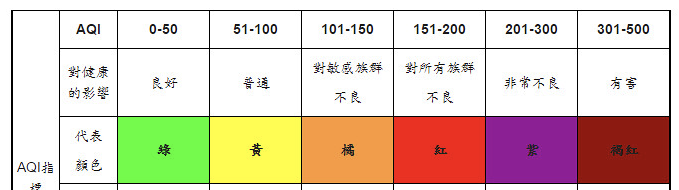

In [24]:
for i, site in enumerate(aqdata):
    if site["AQI"] == "":
        aqdata[i]["Quality"] = "Unknown"
    # Your code should be here

    ## add more role here

for site in aqdata:
    print(site["SiteName"], "\t", site["Quality"])

屏東(建興) 	 yellow
臺南(學甲) 	 yellow
新北(樹林) 	 Green
屏東(琉球) 	 Brown
臺南(麻豆) 	 Brown
高雄(湖內) 	 Brown
大城 	 Brown
富貴角 	 yellow
麥寮 	 yellow
關山 	 Green
馬公 	 yellow
金門 	 yellow
馬祖 	 yellow
埔里 	 yellow
復興 	 yellow
永和 	 Green
竹山 	 Brown
中壢 	 yellow
三重 	 yellow
冬山 	 Green
宜蘭 	 Green
陽明 	 Green
花蓮 	 Green
臺東 	 Green
恆春 	 Green
潮州 	 Brown
屏東 	 yellow
小港 	 yellow
前鎮 	 Brown
前金 	 Brown
左營 	 Brown
楠梓 	 yellow
林園 	 Brown
大寮 	 yellow
鳳山 	 yellow
仁武 	 yellow
橋頭 	 yellow
美濃 	 yellow
臺南 	 Brown
安南 	 Brown
善化 	 Brown
新營 	 Brown
嘉義 	 Brown
臺西 	 Brown
朴子 	 Brown
新港 	 Brown
崙背 	 yellow
斗六 	 Brown
南投 	 Brown
二林 	 yellow
線西 	 yellow
彰化 	 Brown
西屯 	 yellow
忠明 	 Brown
大里 	 Brown
沙鹿 	 yellow
豐原 	 yellow
三義 	 Brown
苗栗 	 yellow
頭份 	 yellow
新竹 	 yellow
竹東 	 yellow
湖口 	 yellow
龍潭 	 yellow
平鎮 	 Green
觀音 	 Green
大園 	 Green
桃園 	 yellow
大同 	 Green
松山 	 Green
古亭 	 Green
萬華 	 Green
中山 	 Green
士林 	 Green
淡水 	 Green
林口 	 Green
菜寮 	 Green
新莊 	 Green
板橋 	 Green
土城 	 Green
新店 	 Green
萬里 	 yellow
汐止 	 Green
基隆 	 yellow


## AQI by epa's standard

| Label | Range   |
|------|------|
|Good|0~50|
|Moderate|51~100|
|Unhealthy for Sensitive Groups|101~150|
|Unhealthy|151~200|
|Very Unhealthy|201~300|
|Hazardous|301~500|

## (Option) Rescale better

為了避免過多的if-elif-else或者switch的使用，可以先把scale和category寫成兩個List，然後用多一層for-loop來trace該value會落在List的哪個區間。

In [28]:
degree = ['L', 'L', 'L', 'M', 'M', 'M', 'H', 'H','H', 'vH']
scaler = [11, 23, 35, 41, 47, 53, 58, 64, 70, 1000]

for site in aqdata:
    if site['PM2.5'] != "":
        for i, n in enumerate(scaler):
            if int(site['PM2.5']) < n:
                d = i
                break     
        print(int(site['PM2.5']), site['SiteName'], d+1, degree[d])

12 屏東(建興) 2 L
20 臺南(學甲) 2 L
8 新北(樹林) 1 L
28 屏東(琉球) 3 L
14 臺南(麻豆) 2 L
26 高雄(湖內) 3 L
14 大城 2 L
7 富貴角 1 L
14 麥寮 2 L
15 關山 2 L
10 馬公 1 L
10 金門 1 L
5 馬祖 1 L
25 埔里 3 L
30 復興 3 L
12 永和 2 L
22 竹山 2 L
11 中壢 2 L
13 三重 2 L
7 冬山 1 L
5 宜蘭 1 L
11 陽明 2 L
12 花蓮 2 L
14 臺東 2 L
13 恆春 2 L
11 潮州 2 L
22 屏東 2 L
26 小港 3 L
24 前鎮 3 L
23 前金 3 L
25 左營 3 L
23 楠梓 3 L
16 林園 2 L
22 大寮 2 L
36 鳳山 4 M
26 仁武 3 L
31 橋頭 3 L
22 美濃 2 L
26 臺南 3 L
22 安南 2 L
24 善化 3 L
25 新營 3 L
27 嘉義 3 L
16 臺西 2 L
23 朴子 3 L
16 新港 2 L
14 崙背 2 L
21 斗六 2 L
20 南投 2 L
14 二林 2 L
15 線西 2 L
13 彰化 2 L
19 西屯 2 L
18 忠明 2 L
19 大里 2 L
15 沙鹿 2 L
17 豐原 2 L
15 三義 2 L
14 苗栗 2 L
13 頭份 2 L
13 新竹 2 L
13 竹東 2 L
14 湖口 2 L
10 龍潭 1 L
15 平鎮 2 L
10 觀音 1 L
6 大園 1 L
9 桃園 1 L
11 大同 2 L
8 松山 1 L
9 古亭 1 L
11 萬華 2 L
12 中山 2 L
15 士林 2 L
9 淡水 1 L
11 林口 2 L
10 菜寮 1 L
13 新莊 2 L
7 板橋 1 L
7 土城 1 L
10 新店 1 L
8 萬里 1 L
12 汐止 2 L
9 基隆 1 L


# Detect prominant data

通常我們有了這類的資料後，第一個想到的分析方法就是找到最嚴重、最差、變化最劇烈的地區。以下這是個非常好的例子說明要如何運用`if`和`for`找出PM2.5最高的地區。在過程中，必須要注意，原本的資料的資料型態為何，甚至要注意，原本的資料是否有缺漏。在這個案例中，我希望找出，現在PM2.5最高的是哪些站台，且把該站台列印出來。注意，我要列印的是，PM2.5最高的站台，而不是最高的PM2.5值；此外還要注意，PM2.5最高的站台可能不只一個（這時候該怎麼處理？）。


## (Practice) Find the maximum

找到最大值或最小值的概念：就個人的邏輯思考一下，我要怎麼找到一群數的最大值？解題邏輯：把第一個數先拿來當標準，之後確認過每個數，有沒有比這個數更大的，若有的話，最大值就是找到的那個數，沒有的話，那第一個數就是最大值。

In [29]:
# finding the maximum value
alist = [5, 3, 2, 4, 1, 3, 2, 4, 7, 82, 19, 23, 42]

mina, maxa = 10000, 0
min_site, max_site = "", ""
for site in aqdata:
    if int(site['AQI'])> maxa:
        maxa = int(site['AQI'])
        max_site = site['SiteName']
    if int(site['AQI'])< mina:
        mina = int(site['AQI'])    
        min_site = site['SiteName']   

# mina, maxa = 100, 0

#     print maxa, a
print(min_site, mina)
print(max_site, maxa)

關山 35
竹山 132


## Use built-in functions

這類比較大小的簡單功能一定都有人幫忙寫好了（如以下的例子），只要記得使用它就好。但是，要記得這樣的函式其實就是透過類似上述方法來比較大小以找到最大值。

In [30]:
print(min(alist), max(alist), sum(alist), len(alist), float(sum(alist))/len(alist))

1 82 197 13 15.153846153846153


## (Practice) Find the sites with the maximum PM2.5 value

接下來我們將以上述的演算邏輯來找到PM2.5最高的那個site。我們先用上述的核心邏輯來找到最大值（下方的`max_value`）為何，然後再用一個`for`-loop把所有站台看一遍，看看哪些站台的PM2.5值等於`max_value`。

In [33]:
print(aqdata[0].keys())

# Initialize a very small maximum value
max_value = 0

# Compare to see if any one larger than the maximum value
for site in aqdata:
    # add code here


    
print("The maximum PM2.5 value: ", max_value)

# Traverse all sites by for loop to see whose value equals to the maximum PM2.5 value
for site in aqdata:
    if int(site['PM2.5']) == max_value:
        print(site['SiteName'], max_value)

dict_keys(['SiteName', 'County', 'AQI', 'Pollutant', 'Status', 'SO2', 'CO', 'CO_8hr', 'O3', 'O3_8hr', 'PM10', 'PM2.5', 'NO2', 'NOx', 'NO', 'WindSpeed', 'WindDirec', 'PublishTime', 'PM2.5_AVG', 'PM10_AVG', 'SO2_AVG', 'Longitude', 'Latitude', 'SiteId', 'Quality'])
The maximum PM2.5 value:  36
鳳山 36


# Find top n

## (Practice) Sorted by `sorted` function

下列的程式碼想法如下：
1. 我先把所有的PM2.5的值給存起來，
2. 存起來以後，我用`sorted()`這個函式把這些值做排序。
3. 排序後的List我就很方便取一個閾值（最大值、前四分之一大的值或者是前三大的值）。
4. 然後我把大於該閾值的站台都給列印出來，即為所求。

In [36]:
## Use a list to store all PM2.5 value
pm_list = []
for site in aqdata:
    # Your code should be here


        
## sort the list by sorted()
pm_list = sorted(pm_list, reverse = True)

print(pm_list)

[36, 31, 30, 28, 27, 26, 26, 26, 26, 25, 25, 25, 24, 24, 23, 23, 23, 22, 22, 22, 22, 22, 21, 20, 20, 19, 19, 18, 17, 16, 16, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 6, 5, 5]


## Print out the site which values are larger than the first quarter

In [39]:
print(pm_list[int(len(pm_list)/4)])

for site in aqdata:
    if int(site['PM2.5']) >= pm_list[int(len(pm_list)/4)]:
        print(site['SiteName'], site['PM2.5'])

22
屏東(琉球) 28
高雄(湖內) 26
埔里 25
復興 30
竹山 22
屏東 22
小港 26
前鎮 24
前金 23
左營 25
楠梓 23
大寮 22
鳳山 36
仁武 26
橋頭 31
美濃 22
臺南 26
安南 22
善化 24
新營 25
嘉義 27
朴子 23


## (Practice) Print out sites with top 3 serious values

In [40]:
# Your code should be here




28
復興 30
鳳山 36
橋頭 31


## DEMO-Implement `sorted` function by sorting algorithm

在前面的例子我用了一個`sorted`函式就排序了所有的PM2.5的值，那這類`sorted`函式是怎麼寫的呢？我們可以用兩層的排序演算法來達成此事。觀念很簡單：
1. 我先抓住第一個，一一和後面比較，看看有沒有人比他大，有的話，就和後面做置換（Swap），沒有的話就不動，這樣跑過一輪，就可以保證第一個最大。
2. 接下來抓住第二個，一一和後面比較，看看有沒有人比他大，，有的話，就和後面做置換（Swap），沒有的話就不動，這樣跑過一輪，就可以保證第二個是次大的。
3. 依此類推。

Reference
1. https://www.geeksforgeeks.org/bubble-sort/
2. https://en.wikipedia.org/wiki/Bubble_sort


In [ ]:
alist = [3, 5, 1, 3, 2, 4, 8]

In [ ]:
pm_list = []
site_list = []
for site in aqdata["Data"]:
    if site['PM25'] != "" or site['PM25'] != "ND":
        pm_list.append(int(site['PM25']))
        site_list.append(site['SiteName'])
        
for i in range(len(pm_list)):
    for j in range(i+1, len(pm_list)):
        if pm_list[i] < pm_list[j]:
            pm_list[i], pm_list[j] = pm_list[j], pm_list[i]

print(pm_list)

[46, 43, 43, 43, 41, 41, 41, 40, 40, 40, 40, 38, 38, 36, 36, 35, 33, 33, 33, 33, 32, 32, 32, 32, 32, 31, 31, 30, 29, 29, 29, 29, 28, 28, 27, 25, 24, 24, 24, 23, 22, 21, 21, 21, 21, 19, 18, 17, 17, 16, 16, 16, 15, 14, 14, 13, 12, 12, 12, 12, 11, 11, 10, 10, 10, 9, 9, 8, 7, 7, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


# Convert Youbike data as a list of dictionary

操作開放資料的時候，經常會為了方便處理，把資料轉成未來pandas可以處理的形式。而這樣的形式通常是list of dictionary。

In [2]:
import requests
import json
response = requests.get('https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.gz')
data = json.loads(response.text)

In [6]:
site_list = []
# Your code should be here






{'sno': '0001', 'sna': '捷運市政府站(3號出口)', 'tot': '180', 'sbi': '57', 'sarea': '信義區', 'mday': '20211002114217', 'lat': '25.0408578889', 'lng': '121.567904444', 'ar': '忠孝東路/松仁路(東南側)', 'sareaen': 'Xinyi Dist.', 'snaen': 'MRT Taipei City Hall Stataion(Exit 3)-2', 'aren': 'The S.W. side of Road Zhongxiao East Road & Road Chung Yan.', 'bemp': '122', 'act': '1'}
--------------------------------------------------------------------------------
{'sno': '0002', 'sna': '捷運國父紀念館站(2號出口)', 'tot': '48', 'sbi': '9', 'sarea': '大安區', 'mday': '20211002114233', 'lat': '25.041254', 'lng': '121.55742', 'ar': '忠孝東路四段/光復南路口(西南側)', 'sareaen': 'Daan Dist.', 'snaen': 'MRT S.Y.S Memorial Hall Stataion(Exit 2.)', 'aren': 'Sec,4. Zhongxiao E.Rd/GuangFu S. Rd', 'bemp': '38', 'act': '1'}
--------------------------------------------------------------------------------
{'sno': '0003', 'sna': '台北市政府', 'tot': '40', 'sbi': '21', 'sarea': '信義區', 'mday': '20211002114244', 'lat': '25.0377972222', 'lng': '121.565169444', 'ar': '台

In [7]:
import pandas as pd
pd.DataFrame(site_list)

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0,0001,捷運市政府站(3號出口),180,57,信義區,20211002114217,25.0408578889,121.567904444,忠孝東路/松仁路(東南側),Xinyi Dist.,MRT Taipei City Hall Stataion(Exit 3)-2,The S.W. side of Road Zhongxiao East Road & Ro...,122,1
1,0002,捷運國父紀念館站(2號出口),48,9,大安區,20211002114233,25.041254,121.55742,忠孝東路四段/光復南路口(西南側),Daan Dist.,MRT S.Y.S Memorial Hall Stataion(Exit 2.),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",38,1
2,0003,台北市政府,40,21,信義區,20211002114244,25.0377972222,121.565169444,台北市政府東門(松智路) (鄰近信義商圈/台北探索館),Xinyi Dist.,Taipei City Hall,Taipei City Government Eastgate (Song Zhi Road),19,1
3,0004,市民廣場,60,12,信義區,20211002114233,25.0360361111,121.562325,市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),Xinyi Dist.,Citizen Square,The N.W. side of Road Shifu & Road Song Shou.,48,1
4,0005,興雅國中,60,15,信義區,20211002114216,25.0365638889,121.5686639,松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),Xinyi Dist.,Xingya Jr. High School,"The S.E. side of Road Songren & Ln. 95, Songre...",44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0401,南京新生路口,24,6,中山區,20211002114217,25.051944,121.527661,新生北路一段 / 南京東路一段口(橋墩下方)(鄰近林森公園/康樂公園),Zhongshan Dist.,Nanjing & Xinsheng Intersection,"Sec. 1, Xinsheng N. Rd. / Sec. 1, Nanjing E. Rd.",18,1
395,0402,下灣公園,28,4,內湖區,20211002114231,25.065159,121.595611,民權東路六段206巷 / 民權東路六段190巷75弄口,Neihu Dist.,Siawan Park,"Ln. 206, Sec. 6, Minquan E. Rd. / Aly. 75, Ln....",14,1
396,0403,捷運內湖站(1號出口),28,4,內湖區,20211002114233,25.083868,121.593929,成功路四段182巷 / 成功路四段182巷6弄口(東南側),Neihu Dist.,MRT Neihu Sta.1(Exit.1),"Ln. 182, Sec. 4, Chenggong Rd. / Aly. 6, Ln. 1...",24,1
397,0404,民族延平路口,20,11,大同區,20211002114238,25.068653,121.510569,民族西路 310 號前方,Datong Dist.,Minzu & Yanping Intersection,"No.310, Minzu W. Rd.",9,1
